In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd


In [2]:
df = pd.read_csv(r"/TOP 100 IMDB MOVIES.csv")
df.head()

,rank,title,description,genre,rating,year
0,18,Spider-Man: Across the Spider-Verse,"Miles Morales catapults across the Multiverse,...","['Animation', 'Action', 'Adventure']",8.7,2023
1,32,Oppenheimer,"The story of American scientist, J. Robert Opp...","['Biography', 'Drama', 'History']",8.6,2023
2,77,Joker,A mentally troubled stand-up comedian embarks ...,"['Crime', 'Drama', 'Thriller']",8.4,2019
3,76,Avengers: Endgame,After the devastating events of Avengers: Infi...,"['Action', 'Adventure', 'Drama']",8.4,2019
4,37,Parasite,Greed and class discrimination threaten the ne...,"['Drama', 'Thriller']",8.5,2019


In [3]:
df.tail()

,rank,title,description,genre,rating,year
95,99,Citizen Kane,Following the death of publishing tycoon Charl...,"['Drama', 'Mystery']",8.3,1941
96,65,The Great Dictator,Dictator Adenoid Hynkel tries to expand his em...,"['Comedy', 'Drama', 'War']",8.4,1940
97,49,Modern Times,The Tramp struggles to live in modern industri...,"['Comedy', 'Drama', 'Romance']",8.5,1936
98,54,City Lights,"With the aid of a wealthy erratic tippler, a d...","['Comedy', 'Drama', 'Romance']",8.5,1931
99,100,M,When the police in a German city are unable to...,"['Crime', 'Mystery', 'Thriller']",8.3,1931


In [9]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   title        100 non-null    object 
 2   description  100 non-null    object 
 3   genre        100 non-null    object 
 4   rating       100 non-null    float64
 5   year         100 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


,rank,rating,year
count,100.000000,100.00000,100.000000
mean,50.500000,8.52200,1988.070000
std,29.011492,0.20869,23.069178
min,1.000000,8.30000,1931.000000
25%,25.750000,8.40000,1974.750000
50%,50.500000,8.50000,1994.000000
75%,75.250000,8.60000,2003.250000
max,100.000000,9.30000,2023.000000


In [10]:
import plotly.express as px
import pandas as pd

numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()

fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='RdBu_r')
fig.show()

In [11]:
df.columns.tolist()


['rank', 'title', 'description', 'genre', 'rating', 'year']

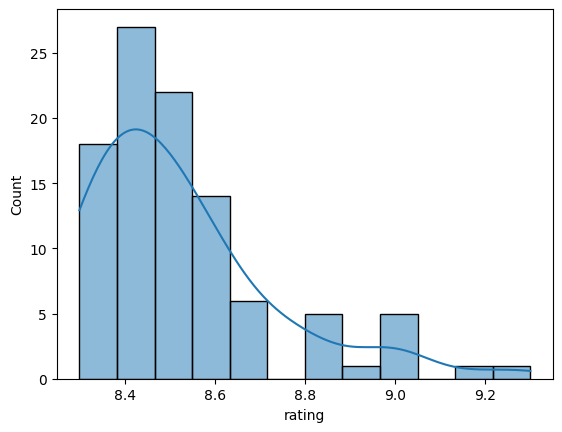

In [14]:
sns.histplot(x='rating',data=df,kde=True)
plt.show()
#histogram for ratings

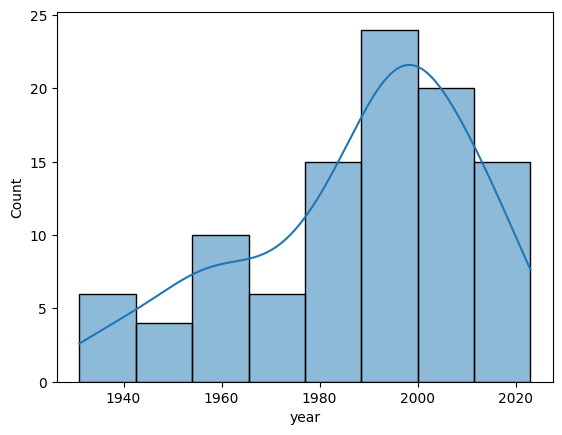

In [15]:
sns.histplot(x='year',data=df,kde=True)
plt.show()
#histogram for year of release

In [18]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = [ 'genre', 'rating', 'year']

# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue

        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']

            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )

            # Show the figure
            fig.show()


             # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )

             # Show the figure
            fig.show()

    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

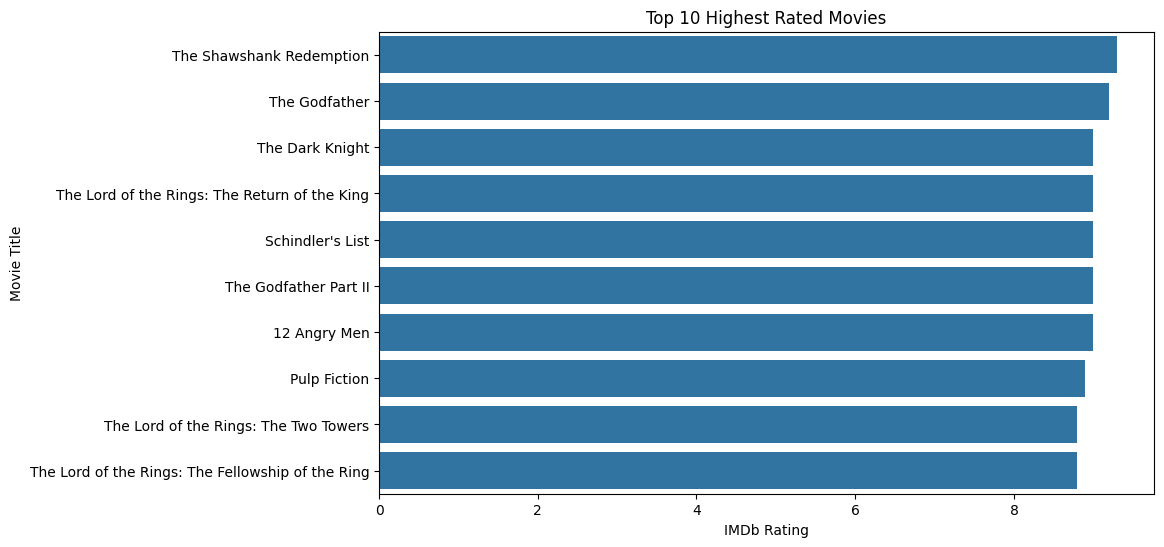

In [20]:
top10_movies = df.nlargest(10, 'rating')[['title', 'rating']]
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='title', data=top10_movies)
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.show()